In [1]:
pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 45.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [3]:
import logging
import warnings
logging.getLogger('prophet').setLevel(logging.ERROR)#suppress neuralprophet logging messages
warnings.filterwarnings("ignore")#suppress other warnings


In [4]:
data = pd.read_csv('bike_sharing_daily.csv')

In [5]:
#convert the date column to datetime format for time series analysis
data["ds"] = pd.to_datetime(data["dteday"])

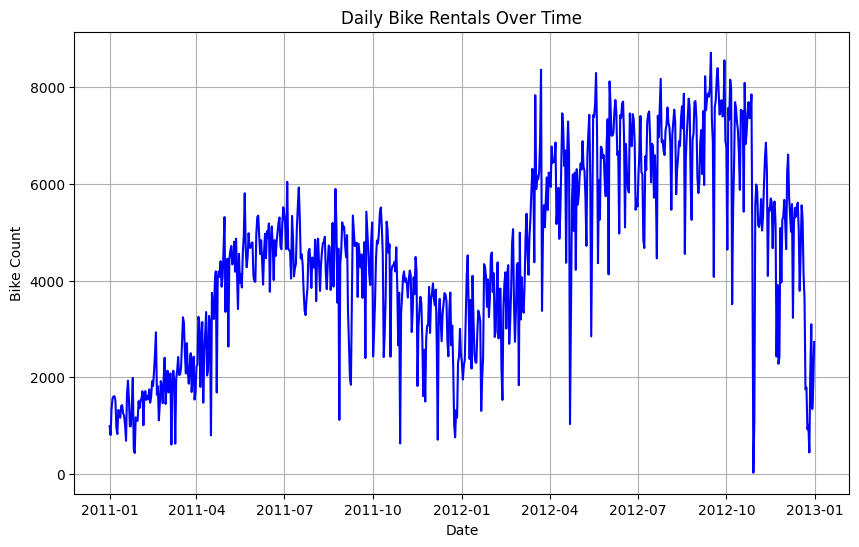

In [6]:
#visualize the historical bike usage data
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data["cnt"], color='blue')
plt.xlabel("Date")
plt.ylabel("Bike Count")
plt.title("Daily Bike Rentals Over Time")
plt.grid(True)
plt.show()

In [7]:
df=data[['ds','cnt']].copy()#selects the (date) and (count of bikes rented) columns and creates a copy of them.
df.columns=['ds','y']#renames the columns to 'ds' for the date and 'y' for the target variable (bike count).
#to avoid changes in the original file

In [8]:
#define quantiles for prediction intervals
quantilelist=[0.05,0.1,0.5,0.9,0.95]

In [9]:
from neuralprophet import NeuralProphet
#initialize the NeuralProphet model
m = NeuralProphet(quantiles=quantilelist)
#add custom seasonality with different names
m.add_seasonality(name='my_weekly',period=7, fourier_order=8)#custom weekly seasonality
m.add_seasonality(name='my_yearly',period=365.25, fourier_order=10)#custom yearly seasonality
m.fit(df, freq='D')


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (23) is too small than the required number                     for the learning rate finder (222). The results might not be optimal.


Finding best initial lr:   0%|          | 0/222 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,4.047935,0.0,11764.219727,13674.131836,4.040427,0.0,0
1,3.129618,0.0,10072.626953,11838.693359,3.127272,0.0,1
2,2.253282,0.0,8343.181641,9960.852539,2.251095,0.0,2
3,1.477675,0.0,6631.279785,8091.074707,1.476057,0.0,3
4,0.832810,0.0,4973.739258,6247.257324,0.831437,0.0,4
...,...,...,...,...,...,...,...
125,0.038042,0.0,678.528687,932.676025,0.038025,0.0,125
126,0.037913,0.0,677.180664,927.610413,0.037819,0.0,126
127,0.037970,0.0,677.117004,935.337402,0.037973,0.0,127
128,0.037943,0.0,677.336304,929.524536,0.037899,0.0,128


Exception: Country must be specified prior to model fitting.

In [11]:
#set plotting backend to matplotlib
m.set_plotting_backend("matplotlib")

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


In [12]:
df_train,df_test=m.split_df(df, valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [14]:

# Create a future dataframe to make predictions for the next 365 days
future=m.make_future_dataframe(df,periods=365)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [42]:
#generate the forecast based on the trained model
forecast = m.predict(future)
print("Forecast Data (Last 5 Days):\n", forecast.tail())

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


Forecast Data (Last 5 Days):
             ds     y        yhat1   yhat1 5.0%  yhat1 10.0%  yhat1 90.0%  \
360 2013-12-27  None  3632.794189  1323.244751  2329.918213  5472.627930   
361 2013-12-28  None  3444.355225   597.001831  1625.057129  5605.009277   
362 2013-12-29  None  2980.406494   275.519501  1281.917480  5020.358398   
363 2013-12-30  None  3198.438721   540.319885  1687.766968  5070.292969   
364 2013-12-31  None  3305.019287   635.031372  1632.570312  5269.381348   

     yhat1 95.0%        trend  season_yearly  season_weekly  season_my_weekly  \
360  5472.627930  4311.907227    -121.393295     132.956390       2000.454224   
361  5605.009277  4312.934082     -14.682878    -899.690247       2884.721436   
362  5020.358398  4313.961426      91.543961   -1694.112915       3241.517090   
363  5070.292969  4314.988281     196.819412   -1368.313477       3146.092041   
364  5269.381348  4316.015137     300.168030    -938.778198       2821.891357   

     season_my_yearly  
36

In [16]:

#extract actual values from the test set
y_actual=df_test['y'].values
print(y_actual)

[7534 7286 5786 6299 6544 6883 6784 7347 7605 7148 7865 4549 6530 7006
 7375 7765 7582 6053 5255 6917 7040 7697 7713 7350 6140 5810 6034 6864
 7112 6203 7504 5976 8227 7525 7767 7870 7804 8009 8714 7333 6869 4073
 7591 7720 8167 8395 7907 7436 7538 7733 7393 7415 8555 6889 6778 4639
 7572 7328 8156 7965 3510 5478 6392 7691 7570 7282 7109 6639 5875 7534
 7461 7509 5424 8090 6824 7058 7466 7693 7359 7444 7852 4459   22 1096
 5566 5986 5847 5138 5107 5259 5686 5035 5315 5992 6536 6852 6269 4094
 5495 5445 5698 5629 4669 5499 5634 5146 2425 3910 2277 2424 5087 3959
 5260 5323 5668 5191 4649 6234 6606 5729 5375 5008 5582 3228 5170 5501
 5319 5532 5611 5047 3786 4585 5557 5267 4128 3623 1749 1787  920 1013
  441 2114 3095 1341 1796 2729]


In [17]:
#prepare the data for Random Forest model
X=data[['temp','hum','windspeed']]#example features
y=data['cnt']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
#initialize and fit the random orest model
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
#make predictions
y_rf_pred = rf_model.predict(X_test)

In [21]:
print(y_rf_pred)

[5380.55 2188.45 3878.37 4091.39 7147.22 5737.19 1425.16 3006.68 6203.94
 5430.54 2569.29 4237.14 7255.51 3467.51 3839.15 3765.06 4776.1  6662.03
 5347.77 1936.4  5476.97 4745.   4409.73 2197.87 2305.02 5800.43 2041.48
 5216.83 2362.73 3301.42 2235.8  5100.49 6439.81 6457.32 4953.75 3565.76
 6166.27 4913.19 4419.11 1149.46 6963.36 2584.92 6026.4  5913.08 5348.42
 1941.93 5392.01 5510.82 4936.18 3606.53 4097.93 2411.93 3435.91 6169.58
 5543.21 5358.67 2668.54 5967.22 4620.32 5245.93 5411.84 5213.13 1759.42
 5846.36 6258.13 5350.46 5903.2  6035.23 2881.57 7326.89 5413.3  4971.74
 4332.24 5214.6  4447.76 5687.24 3342.47 6338.4  1407.48 5536.85 2170.08
 2509.74 4088.32 2867.12 3995.91 2593.92 4471.73 4690.07 3476.1  3056.76
 1487.4  5415.09 4344.73 4875.67 2275.09 2164.26 6650.24 1493.71 2917.81
 6143.93 5978.69 5429.57 5320.24 2600.39 4100.65 4049.14 3221.31 2937.12
 5175.3  1312.6  5416.4  4139.21 4139.89 6083.68 5082.28 4737.94 2598.52
 2755.49 5410.68 2176.84 5717.46 3110.39 7176.9  20

In [22]:
# Calculate metrics for Random Forest
rf_mae=mean_absolute_error(y_test,y_rf_pred)
rf_mse=mean_squared_error(y_test,y_rf_pred)
rf_rmse=np.sqrt(rf_mse)

In [23]:

print(f"Random Forest MAE: {rf_mae:.2f}, MSE: {rf_mse:.2f}, RMSE: {rf_rmse:.2f}")

Random Forest MAE: 1176.38, MSE: 2130239.65, RMSE: 1459.53


In [24]:
#get predictions from NeuralProphet
y_np_pred=forecast['yhat1'].values[-len(y_actual):]#get predictions corresponding to the test set

In [25]:
print(y_np_pred)

[7406.293  7446.8423 7375.588  7013.5796 7103.4004 7281.9365 7371.67
 7496.4014 7438.975  7445.173  6973.1577 7118.8613 7202.123  7348.783
 7388.6074 7311.9414 7298.259  6837.2505 6970.872  7062.514  7227.361
 7269.291  7287.5327 7137.865  6846.0186 6942.3887 7131.8545 7241.624
 7395.126  7363.523  7255.2017 6994.3726 7116.327  7333.2925 7463.6855
 7634.931  7625.0054 7592.6685 7255.6733 7442.0767 7570.148  7772.3086
 7838.782  7870.1147 7735.2095 7431.839  7501.239  7593.0493 7754.918
 7781.5576 7773.8413 7592.0435 7251.253  7303.736  7429.392  7473.5366
 7566.419  7461.012  7353.309  6930.777  7052.727  7112.8774 7241.8613
 7270.825  7183.149  7099.2017 6705.4297 6842.286  6928.7236 7091.025
 7131.7603 7141.358  6989.545  6677.3706 6733.298  6894.698  6978.445
 7076.6323 6992.3994 6807.148  6460.106  6492.826  6601.9443 6557.766
 6688.7046 6550.863  6411.316  5941.3203 6012.9136 6016.708  6009.086
 6044.2817 5975.4526 5743.5815 5353.533  5357.678  5384.6177 5413.3784
 5480.003  5457.

In [26]:

#calculate accuracy metrics for np
mae_np = mean_absolute_error(y_actual, y_np_pred)
mse_np = mean_squared_error(y_actual, y_np_pred)
rmse_np = np.sqrt(mse_np)

In [27]:
print(f"\nNeuralProphet Accuracy Metrics:\nMAE: {mae_np:.2f}\nMSE: {mse_np:.2f}\nRMSE: {rmse_np:.2f}")


NeuralProphet Accuracy Metrics:
MAE: 854.54
MSE: 1682308.31
RMSE: 1297.04


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


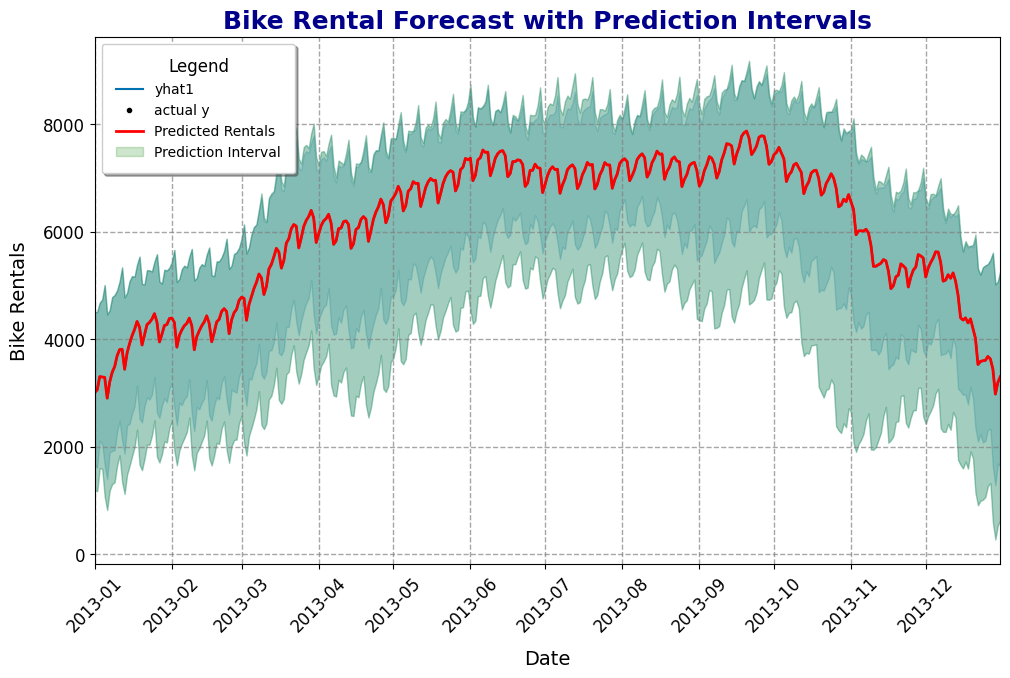

In [53]:
fig_forecast = m.plot(forecast, plotting_backend="matplotlib")
plt.title("Bike Rental Forecast with Prediction Intervals",fontsize=18,fontweight='bold',color='darkblue')
plt.xlabel("Date",fontsize=14,labelpad=10)
plt.ylabel("Bike Rentals",fontsize=14,labelpad=10)
#plot the predicted rentals yhat1 in red
plt.plot(forecast['ds'], forecast['yhat1'], label='Predicted Rentals', color='red', lw=2, linestyle='-')
#fill the area between the prediction interval 5th and 95th percentiles in green with transparency
plt.fill_between(
    forecast['ds'],forecast['yhat1 5.0%'],forecast['yhat1 95.0%'],
    color='green', alpha=0.2, label='Prediction Interval'
)
#add gridline
plt.grid(True, linestyle='--',alpha=0.7)  # Dashed gridlines with transparency

#customize the legend
plt.legend(
    loc='upper left', fontsize=10, frameon=True, shadow=True, borderpad=1,
    fancybox=True, title='Legend', title_fontsize=12
)
#improve x-axis formatting with rotated tick labels for better readability
plt.xticks(fontsize=12, rotation=45)#set font size and rotate x-axis labels by 45 degrees
plt.yticks(fontsize=12)#set font size for y-axis labels
#optionally zoom in on the range of dates covered in the forecast
plt.xlim(forecast['ds'].min(), forecast['ds'].max())  # Limit the x-axis to the forecast date range
#plt.tight_layout()
plt.show()
